In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [28]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [29]:
X

array([[ -8.42280848, -10.13544992],
       [ 10.45610387,   0.54566576],
       [  0.46254228,  -7.61913816],
       ...,
       [ -8.76699022,  -9.88555212],
       [ -7.80521951,  -9.65802291],
       [  8.06317971,   1.54283226]], shape=(1000, 2))

In [30]:
y

array([2, 0, 1, 2, 2, 0, 2, 2, 2, 0, 2, 0, 1, 1, 0, 2, 0, 2, 1, 0, 2, 1,
       1, 2, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 0, 1,
       0, 1, 0, 2, 1, 1, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 1, 0, 1,
       0, 2, 2, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0, 2, 2, 1, 2, 0, 0, 0, 0, 1,
       2, 0, 1, 0, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 0, 2, 1, 0, 1, 1, 1,
       1, 1, 2, 2, 0, 1, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 0, 1, 0, 2, 0, 1, 0, 0, 2, 2, 0, 0, 1, 0, 2, 0, 1, 2, 0,
       1, 1, 0, 0, 2, 0, 0, 0, 1, 1, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 0, 1,
       1, 0, 2, 1, 0, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 0, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 1, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 1, 1, 2, 0,
       1, 1, 1, 1, 2, 0, 2, 2, 0, 0, 1, 1, 1, 0, 2, 1, 0, 0, 2, 2, 0, 2,
       1, 2, 2, 1, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 1, 2, 0, 2, 1, 2, 2, 0,
       1, 2, 1, 0, 2, 2, 1, 2, 0, 1, 1, 2, 0, 1, 2, 1, 2, 0, 2, 0, 2, 2,
       1, 1, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 1, 2,

In [31]:
plt.scatter(X[:,0],X[:,1],c=y)

In [32]:
## standardization--feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [35]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [36]:
from sklearn.cluster import KMeans

In [37]:
## Elbow method To select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\Lenovo\anaconda3\envs\atulshahi\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Lenovo\anaconda3\envs\atulshahi\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Lenovo\anaconda3\envs\atulshahi\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Lenovo\anaconda3\envs\atulshahi\Lib\site-packages\sklearn\cluster\_kmeans.py:14

In [38]:
wcss

[1340.0000000000014,
 312.51397085384093,
 42.41765544448813,
 36.85217704569668,
 28.71058555895705,
 28.841318548282306,
 21.496539563633977,
 22.67312874520397,
 17.305433288886743,
 15.919793120772177]

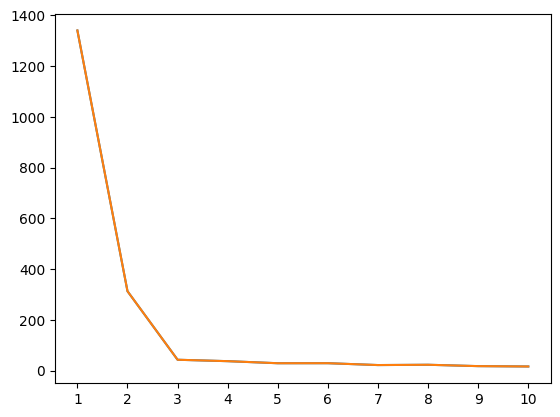

In [41]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.show()

In [42]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [43]:
kmeans.fit_predict(X_train_scaled)

C:\Users\Lenovo\anaconda3\envs\atulshahi\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


array([2, 2, 1, 1, 2, 0, 0, 1, 2, 2, 2, 1, 1, 0, 2, 1, 2, 2, 0, 1, 2, 0,
       2, 0, 2, 1, 2, 1, 2, 2, 1, 0, 1, 1, 2, 0, 1, 2, 0, 2, 2, 0, 0, 0,
       2, 1, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 2, 2, 2, 2, 0, 0, 0, 1, 1,
       0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0, 0, 2, 2, 1,
       1, 1, 0, 2, 0, 1, 0, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 0, 2, 0, 0, 2,
       0, 2, 0, 1, 2, 2, 0, 0, 0, 0, 1, 1, 2, 0, 2, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 0, 0, 1, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 2, 0, 1, 1,
       2, 0, 1, 0, 2, 0, 2, 0, 0, 0, 1, 2, 1, 1, 1, 0, 0, 1, 2, 0, 1, 0,
       1, 2, 2, 0, 2, 1, 0, 2, 0, 2, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 1, 2,
       2, 2, 0, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1, 1, 2, 2, 0, 1, 1, 2,
       1, 1, 0, 2, 2, 2, 0, 2, 1, 1, 0, 1, 0, 0, 1, 1, 0, 2, 1, 1, 2, 2,
       1, 1, 2, 2, 1, 0, 2, 1, 2, 1, 2, 1, 0, 2, 1, 1, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 2,

In [16]:
y_pred=kmeans.predict(X_test_scaled)

In [17]:
y_pred

array([0, 1, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 0, 0, 2, 0, 1,
       2, 1, 2, 0, 2, 0, 2, 1, 0, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 2, 1,
       0, 0, 2, 1, 1, 2, 1, 0, 0, 2, 0, 0, 1, 2, 2, 0, 2, 1, 2, 2, 0, 0,
       2, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 2, 0, 0, 0, 2, 2, 2, 1, 2, 2, 2,
       1, 1, 0, 2, 0, 1, 1, 2, 0, 0, 2, 0, 2, 1, 1, 2, 0, 1, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 1, 1, 2, 2, 2, 2, 0, 1, 2, 0, 1, 1, 2, 0, 0, 1, 1,
       2, 2, 1, 0, 1, 2, 2, 2, 0, 0, 1, 0, 1, 2, 1, 2, 0, 1, 0, 1, 0, 2,
       2, 1, 0, 2, 0, 0, 2, 1, 1, 0, 2, 2, 1, 1, 0, 1, 1, 0, 2, 0, 2, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 2, 1, 0, 2, 2, 0, 2, 1, 0, 2, 0, 2, 0,
       2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 1, 1, 0, 2, 2, 2,
       1, 0, 0, 1, 1, 1, 0, 2, 2, 1, 2, 0, 1, 1, 2, 2, 0, 1, 0, 1, 2, 1,
       0, 2, 0, 2, 2, 0, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 2, 0, 2, 0, 2, 2, 1, 2, 2, 0, 2, 1, 0, 1, 2,
       0, 2, 1, 1, 1, 2, 1, 0, 1, 0, 2, 1, 1, 0, 1,

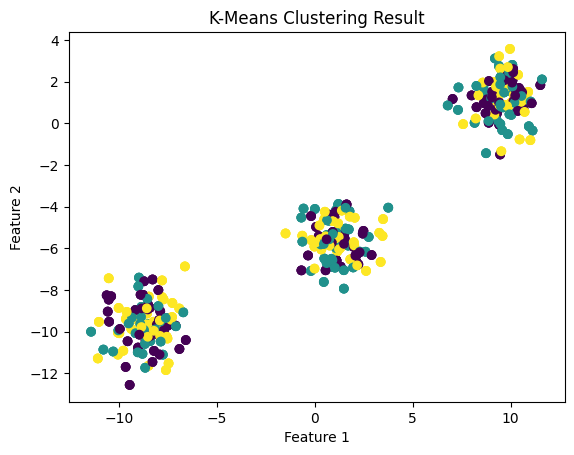

In [46]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clustering Result")
plt.show()

In [47]:
## Validating the k value
## kneelocator
## Silhoutee scoring

In [48]:
## kneelocator
!pip install kneed

In [49]:
from kneed import KneeLocator

In [50]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [51]:
kl.elbow

np.int64(3)

In [52]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [53]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

C:\Users\Lenovo\anaconda3\envs\atulshahi\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Lenovo\anaconda3\envs\atulshahi\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Lenovo\anaconda3\envs\atulshahi\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Lenovo\anaconda3\envs\atulshahi\Lib\site-packages\sklearn\cluster\_kmeans.py:14

In [54]:
silhouette_coefficients

[0.6984458664688916,
 0.8091554569372729,
 0.6812899773038816,
 0.5399860528345303,
 0.3826908536735738,
 0.3740966593965765,
 0.3457780808159498,
 0.3629710883950532,
 0.34098929347453577]

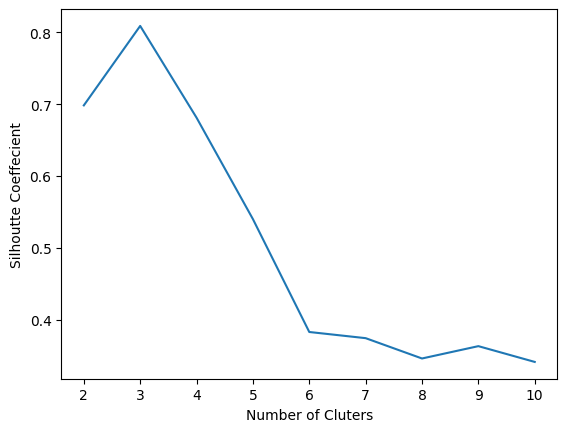

In [56]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()